In [ ]:
#| hide
!pip install -Uqq nixtla

In [ ]:
#| hide 
from nixtla.utils import in_colab

In [ ]:
#| hide 
IN_COLAB = in_colab()

In [ ]:
#| hide
if not IN_COLAB:
    from nixtla.utils import colab_badge
    from dotenv import load_dotenv

# Quantile forecasts

In forecasting, we are often interested in a distribution of predictions rather than only a point prediction, because we want to have a notion of the uncertainty around the forecast.\
\
To this end, we can create _quantile forecasts_.\
\
Quantile forecasts have an intuitive interpretation, as they present a specific percentile of the forecast distribution. This allows us to make statements such as 'we expect 90% of our observations of air passengers to be above 100'. This approach is helpful for planning under uncertainty, providing a spectrum of possible future values and helping users make more informed decisions by considering the full range of potential outcomes.\
\
With TimeGPT, we can create a distribution of forecasts, and extract the quantile forecasts for a specified percentile. For instance, the 25th and 75th quantiles give insights into the lower and upper quartiles of expected outcomes, respectively, while the 50th quantile, or median, offers a central estimate.\
\
TimeGPT uses [conformal prediction](https://en.wikipedia.org/wiki/Conformal_prediction) to produce the quantiles.

In [ ]:
#| echo: false
if not IN_COLAB:
    load_dotenv()    
    colab_badge('docs/tutorials/10_uncertainty_quantification_with_quantile_forecasts')

[![](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Nixtla/nixtla/blob/main/nbs/docs/tutorials/10_uncertainty_quantification_with_quantile_forecasts.ipynb)

## 1. Import packages
First, we import the required packages and initialize the Nixtla client

In [ ]:
import pandas as pd
from nixtla import NixtlaClient

from IPython.display import display

In [ ]:
nixtla_client = NixtlaClient(
    # defaults to os.environ.get("NIXTLA_API_KEY")
    api_key = 'my_api_key_provided_by_nixtla'
)

In [ ]:
#| hide
if not IN_COLAB:
    nixtla_client = NixtlaClient()

## 2. Load data

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv')
df.head()

timestamp  value
0  1949-01-01    112
1  1949-02-01    118
2  1949-03-01    132
3  1949-04-01    129
4  1949-05-01    121

## 3. Forecast with quantiles
When using TimeGPT for time series forecasting, you can set the quantiles you want to predict. Here's how you could do it:

In [ ]:
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
timegpt_quantile_fcst_df = nixtla_client.forecast(
    df=df, h=12, 
    quantiles=quantiles, 
    time_col='timestamp', target_col='value',
)
timegpt_quantile_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


timestamp     TimeGPT  TimeGPT-q-10  TimeGPT-q-20  TimeGPT-q-30  \
0  1961-01-01  437.837952    431.987091    435.043799    435.384363   
1  1961-02-01  426.062744    412.704956    414.832837    416.042432   
2  1961-03-01  463.116577    437.412564    444.234985    446.420233   
3  1961-04-01  478.244507    448.726837    455.428375    465.570038   
4  1961-05-01  505.646484    478.409872    493.154315    497.990848   

   TimeGPT-q-40  TimeGPT-q-50  TimeGPT-q-60  TimeGPT-q-70  TimeGPT-q-80  \
0    436.402155    437.837952    439.273749    440.291541    440.632104   
1    421.719196    426.062744    430.406293    436.083057    437.292651   
2    450.705762    463.116577    475.527393    479.812921    481.998169   
3    469.879114    478.244507    486.609900    490.918976    501.060638   
4    499.138708    505.646484    512.154260    513.302121    518.138654   

   TimeGPT-q-90  
0    443.688812  
1    439.420532  
2    488.820590  
3    507.762177  
4    532.883096

TimeGPT will return forecasts in the format `TimeGPT-q-{int(100 * q)}` for each quantile `q`.

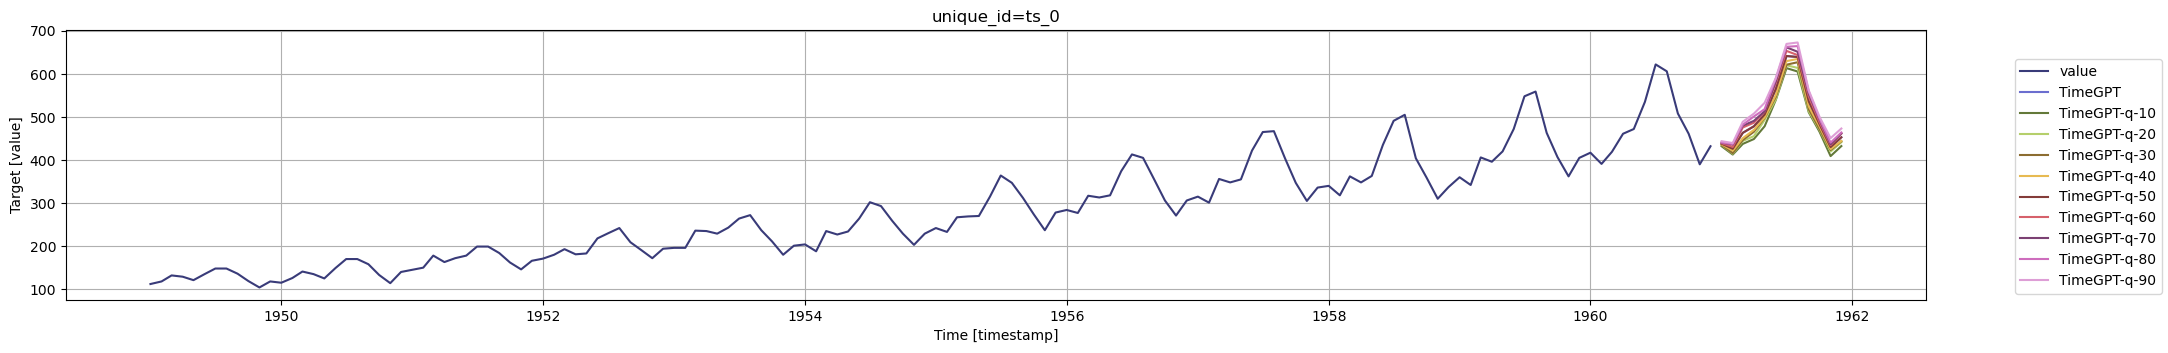

In [ ]:
nixtla_client.plot(
    df, timegpt_quantile_fcst_df, 
    time_col='timestamp', target_col='value',
)

It's essential to note that the choice of the quantile (or quantiles) depends on your specific use case. For high-stakes predictions, you might lean towards more conservative quantiles, such as the 10th or 20th percentile, to ensure you're prepared for worse-case scenarios. On the other hand, if you're in a situation where the cost of over-preparation is high, you might choose a quantile closer to the median, like the 50th percentile, to balance being cautious and efficient.

For instance, if you are managing inventory for a retail business during a big sale event, opting for a lower quantile might help you avoid running out of stock, even if it means you might overstock a bit. But if you are scheduling staff for a restaurant, you might go with a quantile closer to the middle to ensure you have enough staff on hand without significantly overstaffing.

Ultimately, the choice comes down to understanding the balance between risk and cost in your specific context, and using quantile forecasts from TimeGPT allows you to tailor your strategy to fit that balance perfectly.

#### Historical Forecast

You can also compute quantile forecasts for historical forecasts adding the `add_history=True` parameter as follows:

In [ ]:
timegpt_quantile_fcst_df = nixtla_client.forecast(
    df=df, h=12, 
    quantiles=quantiles, 
    time_col='timestamp', target_col='value',
    add_history=True,
)
timegpt_quantile_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Calling Historical Forecast Endpoint...


timestamp     TimeGPT  TimeGPT-q-10  TimeGPT-q-20  TimeGPT-q-30  \
0  1951-01-01  135.483673    111.937768    120.020593    125.848879   
1  1951-02-01  144.442398    120.896493    128.979318    134.807604   
2  1951-03-01  157.191910    133.646004    141.728830    147.557116   
3  1951-04-01  148.769363    125.223458    133.306284    139.134570   
4  1951-05-01  140.472946    116.927041    125.009866    130.838152   

   TimeGPT-q-40  TimeGPT-q-50  TimeGPT-q-60  TimeGPT-q-70  TimeGPT-q-80  \
0    130.828935    135.483673    140.138411    145.118467    150.946753   
1    139.787660    144.442398    149.097136    154.077192    159.905478   
2    152.537172    157.191910    161.846648    166.826703    172.654990   
3    144.114625    148.769363    153.424102    158.404157    164.232443   
4    135.818208    140.472946    145.127684    150.107740    155.936026   

   TimeGPT-q-90  
0    159.029579  
1    167.988304  
2    180.737815  
3    172.315269  
4    164.018852

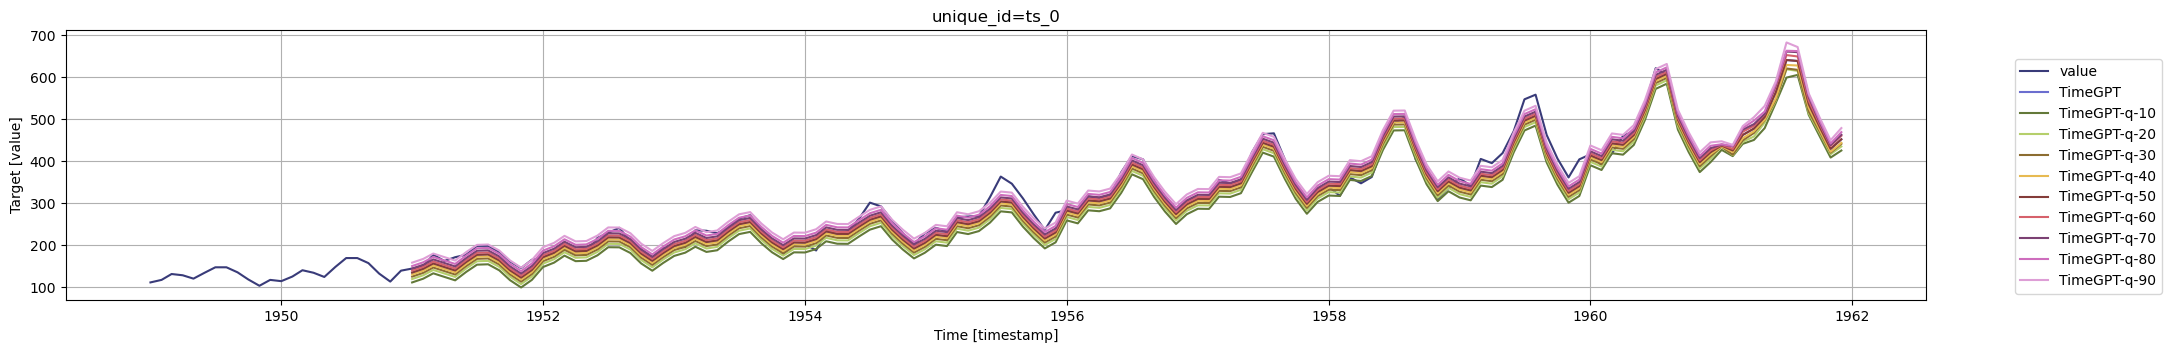

In [ ]:
nixtla_client.plot(
    df, timegpt_quantile_fcst_df, 
    time_col='timestamp', target_col='value',
)

#### Cross Validation

The `quantiles` argument can also be included in the `cross_validation` method, allowing comparing the performance of TimeGPT across different windows and different quantiles.

In [ ]:
timegpt_cv_quantile_fcst_df = nixtla_client.cross_validation(
    df=df, 
    h=12, 
    n_windows=5,
    quantiles=quantiles, 
    time_col='timestamp', 
    target_col='value',
)
timegpt_quantile_fcst_df.head()

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...
INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:V

timestamp     TimeGPT  TimeGPT-q-10  TimeGPT-q-20  TimeGPT-q-30  \
0  1951-01-01  135.483673    111.937768    120.020593    125.848879   
1  1951-02-01  144.442398    120.896493    128.979318    134.807604   
2  1951-03-01  157.191910    133.646004    141.728830    147.557116   
3  1951-04-01  148.769363    125.223458    133.306284    139.134570   
4  1951-05-01  140.472946    116.927041    125.009866    130.838152   

   TimeGPT-q-40  TimeGPT-q-50  TimeGPT-q-60  TimeGPT-q-70  TimeGPT-q-80  \
0    130.828935    135.483673    140.138411    145.118467    150.946753   
1    139.787660    144.442398    149.097136    154.077192    159.905478   
2    152.537172    157.191910    161.846648    166.826703    172.654990   
3    144.114625    148.769363    153.424102    158.404157    164.232443   
4    135.818208    140.472946    145.127684    150.107740    155.936026   

   TimeGPT-q-90  
0    159.029579  
1    167.988304  
2    180.737815  
3    172.315269  
4    164.018852

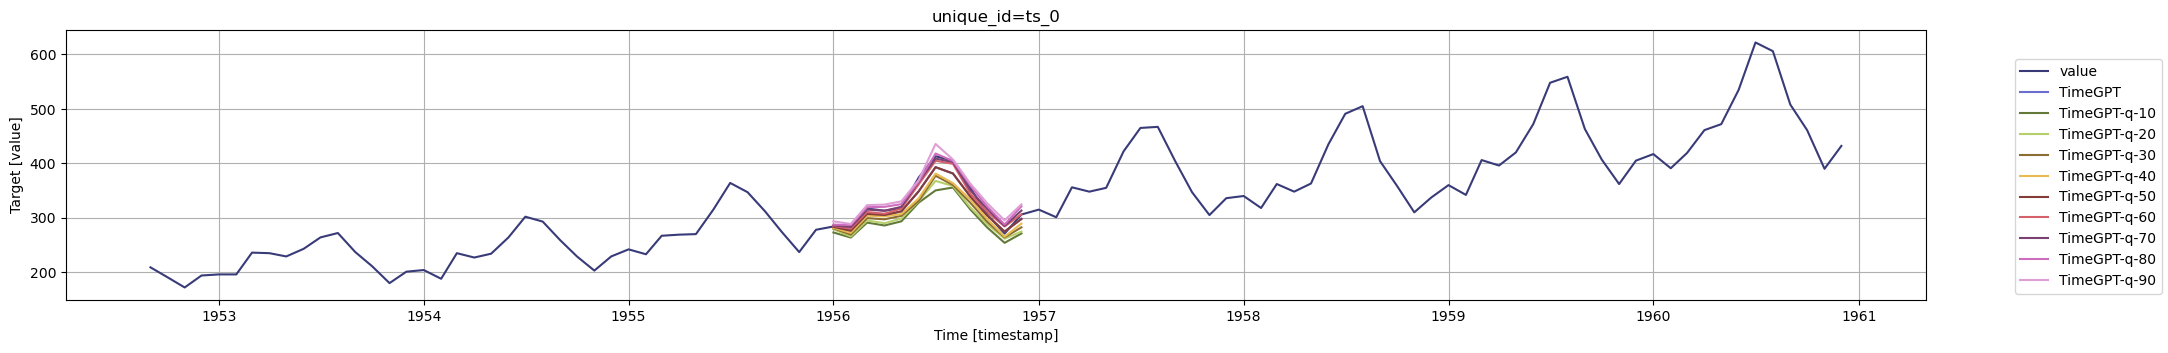

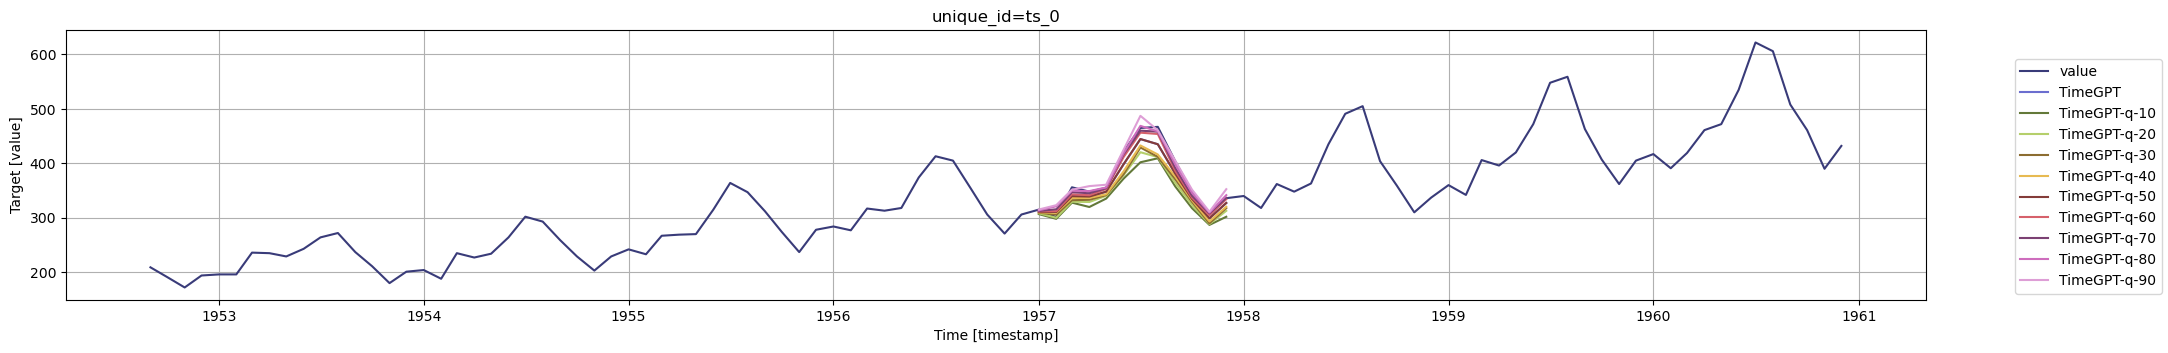

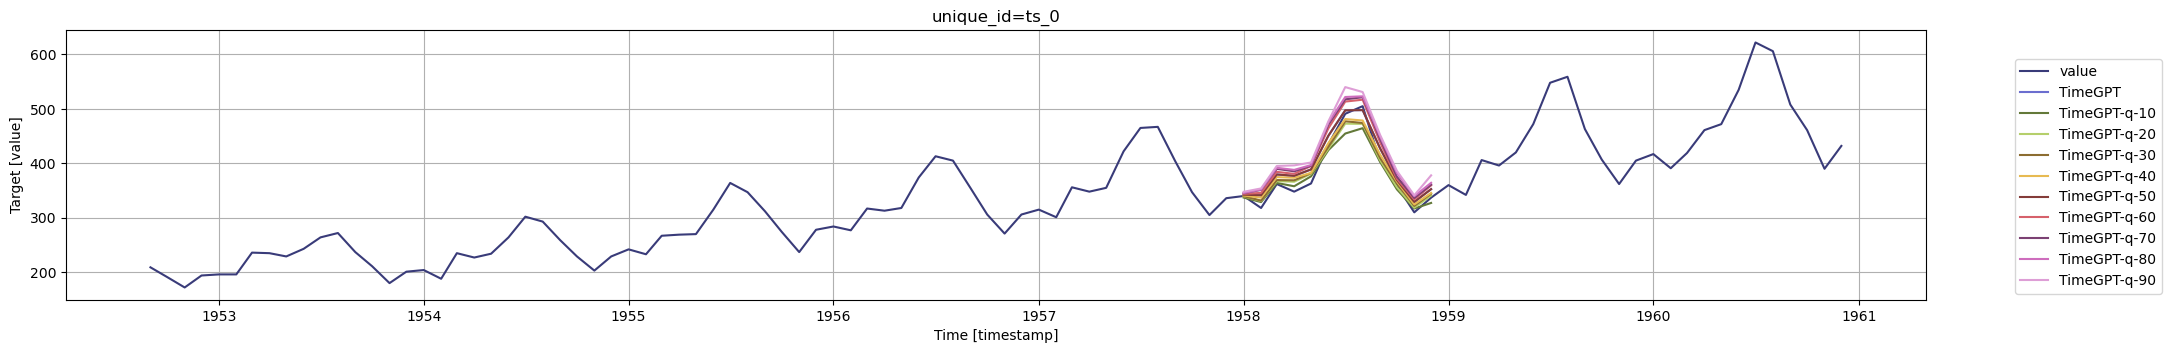

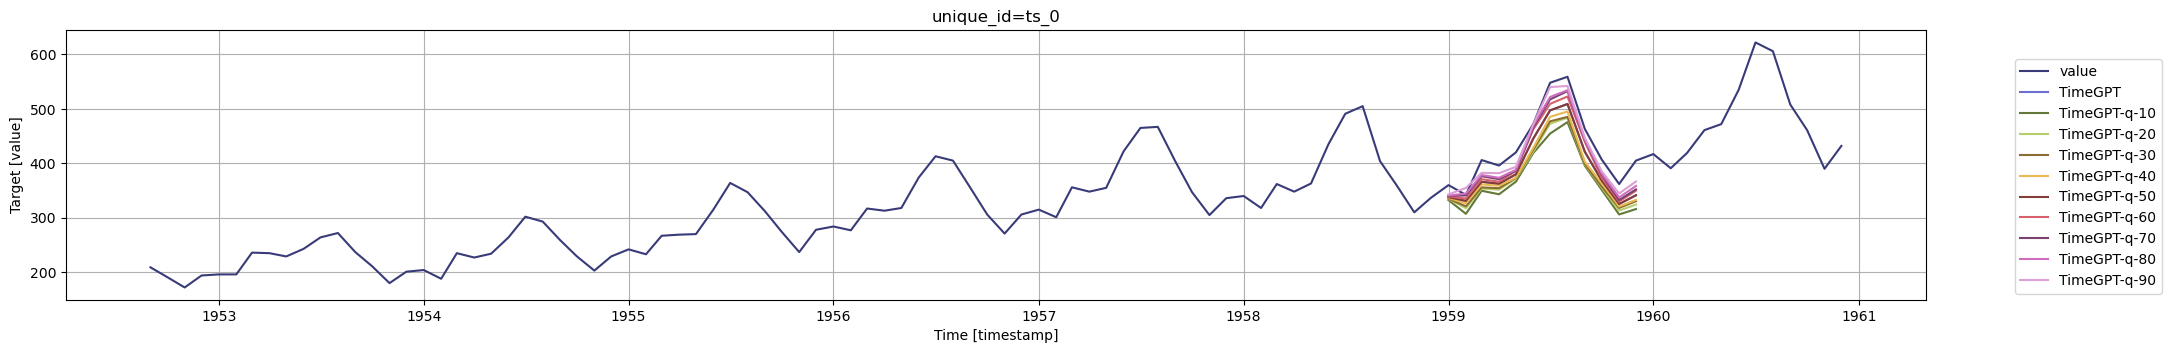

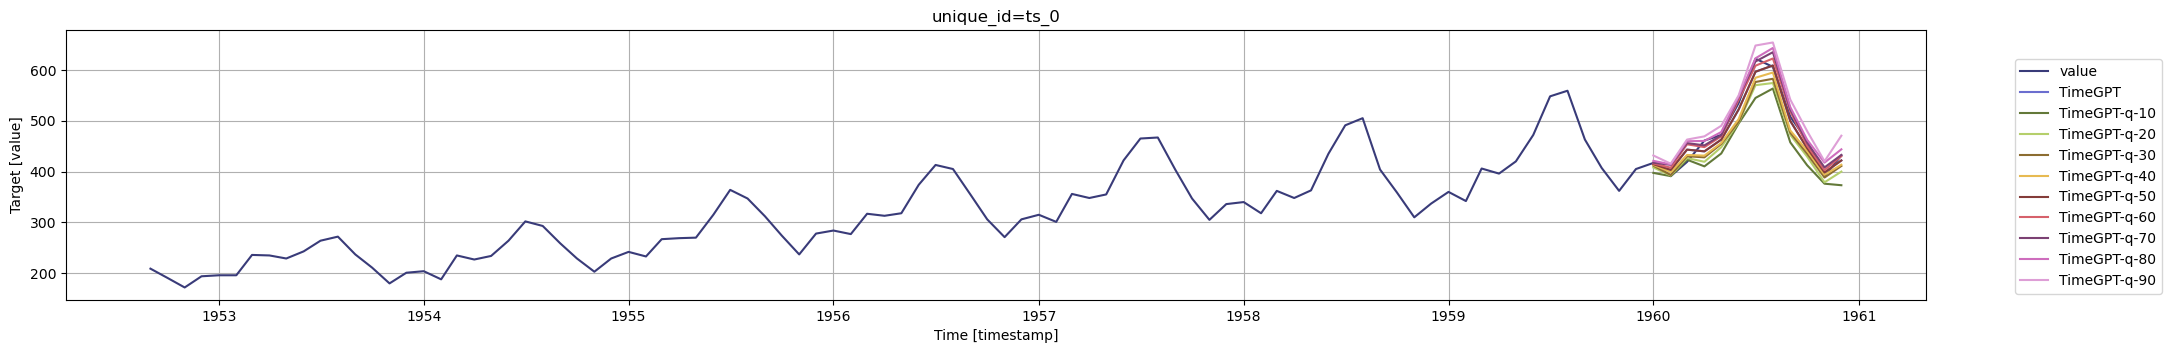

In [ ]:
cutoffs = timegpt_cv_quantile_fcst_df['cutoff'].unique()
for cutoff in cutoffs:
    fig = nixtla_client.plot(
        df.tail(100), 
        timegpt_cv_quantile_fcst_df.query('cutoff == @cutoff').drop(columns=['cutoff', 'value']),
        time_col='timestamp', 
        target_col='value'
    )
    display(fig)